In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.signal import find_peaks

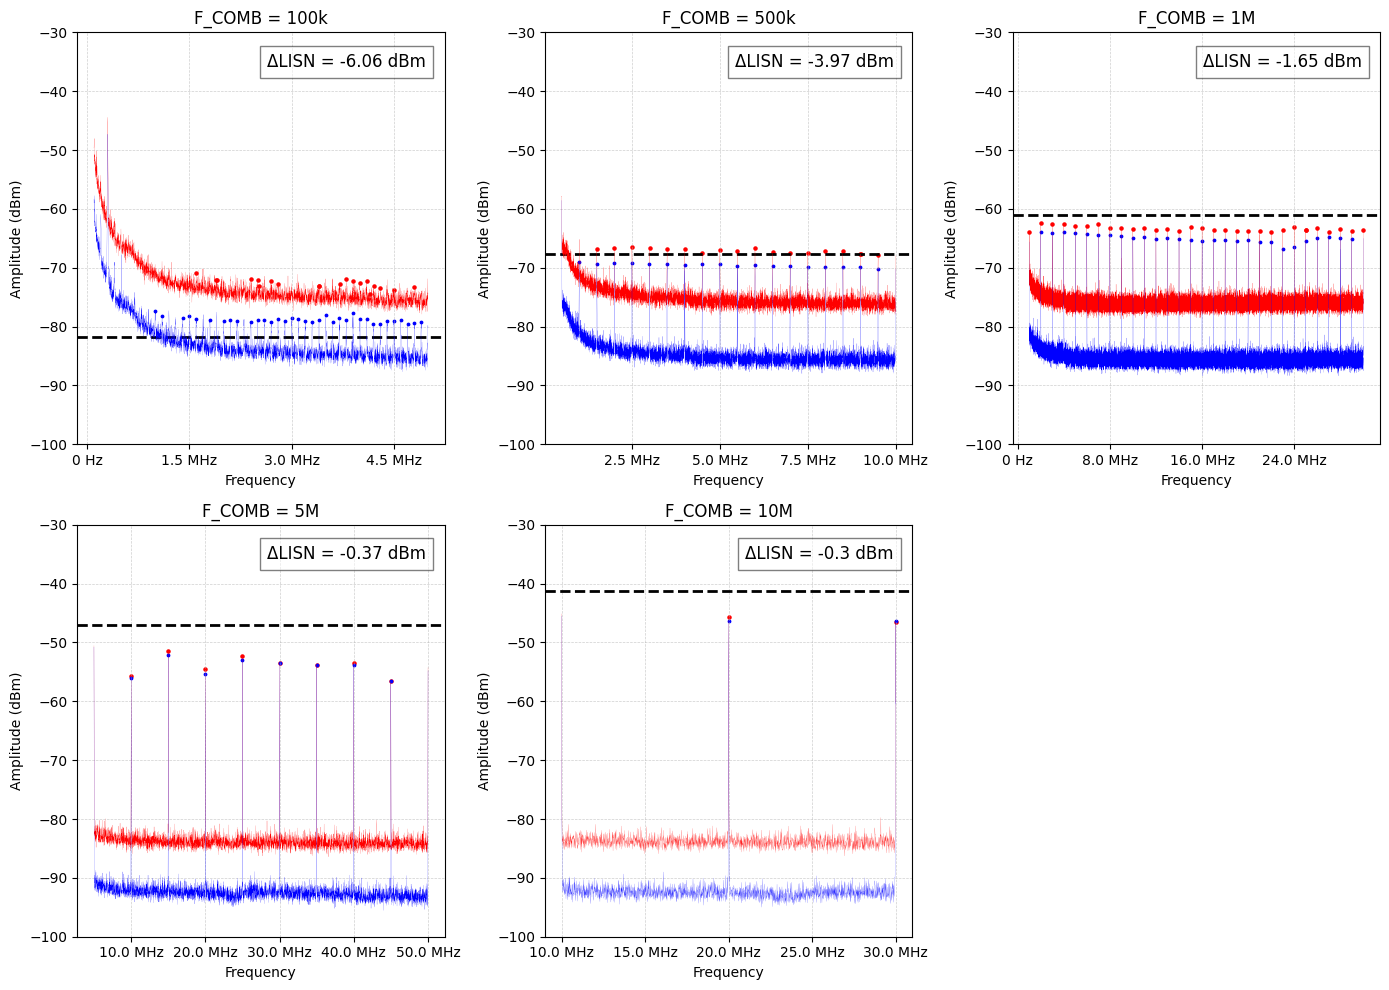

In [11]:
# for each comb frequency
# find the peaks of the EMCO and the ATTEN
# average the peaks
# find the delta between the peaks average

import matplotlib.ticker as ticker

def freq_formatter(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f} MHz'
    elif x >= 1e3:
        return f'{x/1e3:.0f} kHz'
    else:
        return f'{x:.0f} Hz'


f_combs = ['100k', '500k', '1M', '5M', '10M']

fig, axes = plt.subplots(2, 3, figsize=(14, 10))
axes_flat = axes.flatten()

ATTEN_PATH = r"C:\Users\enfxm\Desktop\Python\TekBox-Comb-Generator-EMI-Calibration-Analysis\EMI_CSV_FILES\ATTEN166\LINE"
EMCO_PATH =  r"C:\Users\enfxm\Desktop\Python\TekBox-Comb-Generator-EMI-Calibration-Analysis\EMI_CSV_FILES\EMCO3810\LINE"

tekbox_level = 0

for i in range(5):

    emco_df = pd.read_csv(EMCO_PATH + '\\' + f_combs[i] + '-EMCO3810-LINE')
    atten_df = pd.read_csv(ATTEN_PATH + '\\' + f_combs[i] + '-ATTEN166-LINE')



    if i == 0:
        peaks_enco,_ = find_peaks(emco_df['Amplitude (dBm)'], width=10, height=(None, -70))
        peaks_atten,_ = find_peaks(atten_df['Amplitude (dBm)'], width=8, height=(None, -70))

        tekbox_level = -81.84

    elif i == 1:
        peaks_enco,_ = find_peaks(emco_df['Amplitude (dBm)'], width=11.2)
        peaks_atten,_ = find_peaks(atten_df['Amplitude (dBm)'], width=11.2)

        tekbox_level = -67.72
    elif i == 2:
        peaks_enco,_ = find_peaks(emco_df['Amplitude (dBm)'], height=-69)
        peaks_atten,_ = find_peaks(atten_df['Amplitude (dBm)'], height=-69)

        tekbox_level = -60.99
    elif i == 3:
        peaks_enco,_ = find_peaks(emco_df['Amplitude (dBm)'], height=-69)
        peaks_atten,_ = find_peaks(atten_df['Amplitude (dBm)'], height=-69)

        tekbox_level = -47.12
    elif i == 4:
        peaks_enco,_ = find_peaks(emco_df['Amplitude (dBm)'], height=-69)
        peaks_atten,_ = find_peaks(atten_df['Amplitude (dBm)'], height=-69)

        tekbox_level = -41.19

        
        
    

    EMCO_PEAKS_df = emco_df.iloc[peaks_enco]
    ATTEN_PEAKS_df = atten_df.iloc[peaks_atten]

    ax = axes_flat[i]

    ax.axhline(y=tekbox_level, color='black', linestyle='dashed', linewidth=2)

    ax.plot(atten_df['Frequency (Hz)'], atten_df['Amplitude (dBm)'], linewidth=0.1, color='red')
    ax.scatter(ATTEN_PEAKS_df['Frequency (Hz)'], ATTEN_PEAKS_df['Amplitude (dBm)'], marker='o', color='red', s=5)
    
    ax.plot(emco_df['Frequency (Hz)'], emco_df['Amplitude (dBm)'], linewidth=0.1, color='blue')
    ax.scatter(EMCO_PEAKS_df['Frequency (Hz)'], EMCO_PEAKS_df['Amplitude (dBm)'], marker='o', color='blue', s=3)

    text1 = "ΔLISN = " + str(round(np.average(EMCO_PEAKS_df['Amplitude (dBm)']) - np.average(ATTEN_PEAKS_df['Amplitude (dBm)']), 2)) + " dBm"
    ax.text(0.95, 0.95, 
            text1, 
            verticalalignment='top', 
            horizontalalignment='right', 
            transform=ax.transAxes, # This makes the coordinates relative to the axes (0,0 bottom left; 1,1 top right)
            fontsize=12,
            bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5, 'edgecolor': 'black'})
    

    ax.xaxis.set_major_formatter(ticker.FuncFormatter(freq_formatter))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(5))  # keeps ticks clean
    ax.set_xlabel('Frequency')

    ax.set_ylabel('Amplitude (dBm)')
    ax.set_ylim(-100, -30)



    ax.grid(
        True,
        which='both',        # major + minor grid
        linestyle='--',
        linewidth=0.5,
        alpha=0.6
    )

    ax.set_title("F_COMB = " + f_combs[i])

axes_flat[-1].axis('off')

plt.tight_layout()

plt.show()




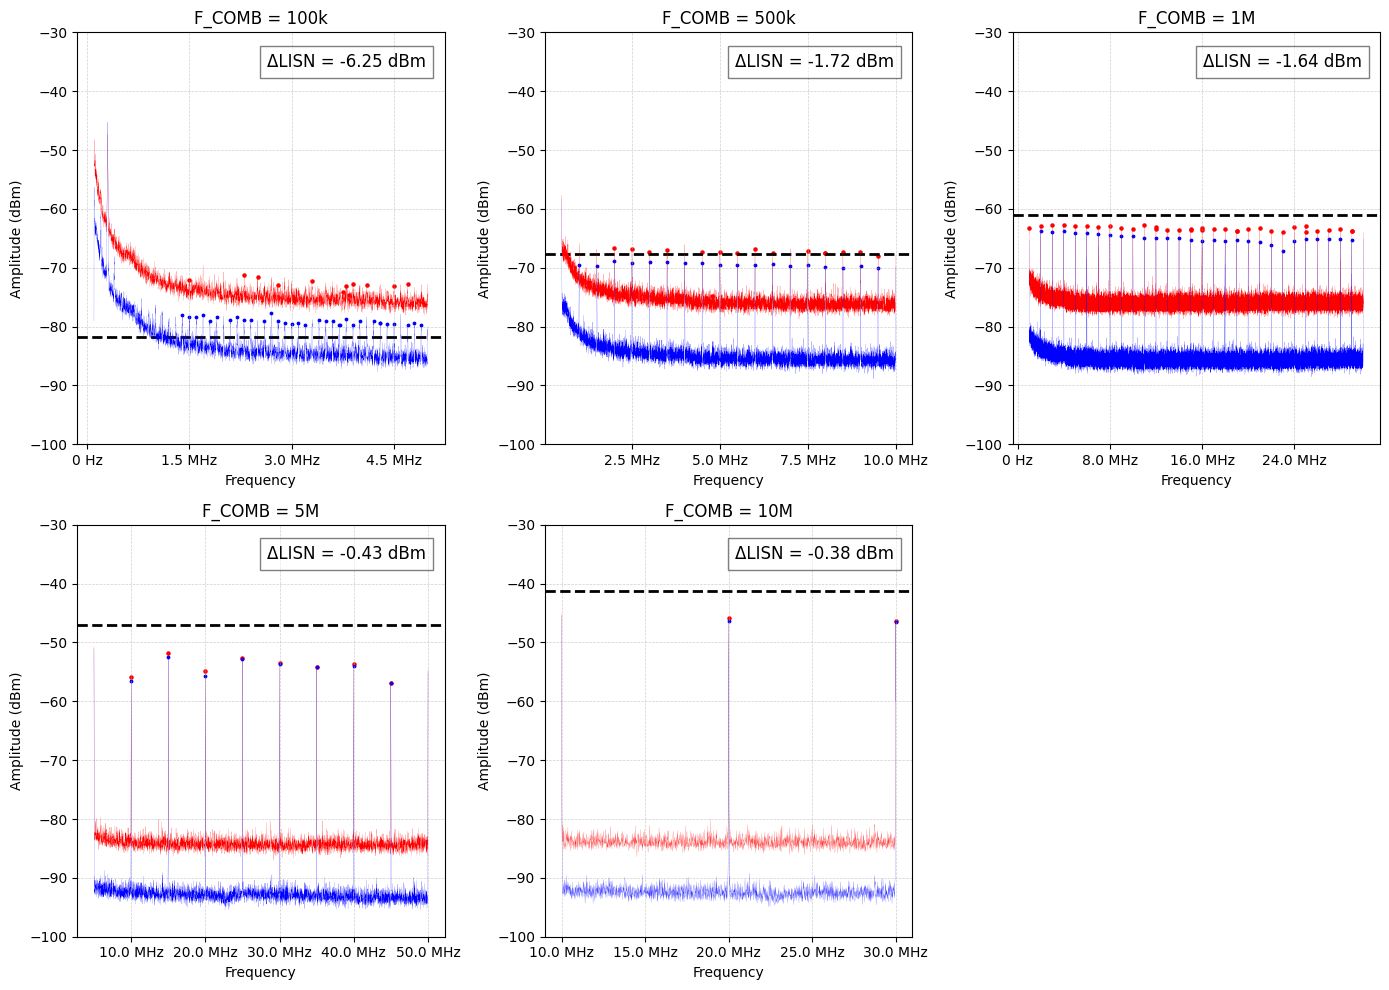

In [12]:
# for each comb frequency
# find the peaks of the EMCO and the ATTEN
# average the peaks
# find the delta between the peaks average

import matplotlib.ticker as ticker

def freq_formatter(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f} MHz'
    elif x >= 1e3:
        return f'{x/1e3:.0f} kHz'
    else:
        return f'{x:.0f} Hz'


f_combs = ['100k', '500k', '1M', '5M', '10M']

fig, axes = plt.subplots(2, 3, figsize=(14, 10))
axes_flat = axes.flatten()

EMCO_PATH = r'C:\Users\enfxm\Desktop\Python\TekBox-Comb-Generator-EMI-Calibration-Analysis\EMI_CSV_FILES\EMCO3810\NEUTRAL'
ATTEN_PATH = r'C:\Users\enfxm\Desktop\Python\TekBox-Comb-Generator-EMI-Calibration-Analysis\EMI_CSV_FILES\ATTEN166\NEUTRAL'

tekbox_level = 0

for i in range(5):

    emco_df = pd.read_csv(EMCO_PATH + '\\' + f_combs[i] + '-EMCO3810-NEUTRAL.csv')
    atten_df = pd.read_csv(ATTEN_PATH + '\\' + f_combs[i] + '-ATTEN166-NEUTRAL.csv')



    if i == 0:
        peaks_enco,_ = find_peaks(emco_df['Amplitude (dBm)'], width=10, height=(None, -70))
        peaks_atten,_ = find_peaks(atten_df['Amplitude (dBm)'], width=8, height=(None, -70))

        tekbox_level = -81.84

    elif i == 1:
        peaks_enco,_ = find_peaks(emco_df['Amplitude (dBm)'], width=11.2)
        peaks_atten,_ = find_peaks(atten_df['Amplitude (dBm)'], width=11.2)

        tekbox_level = -67.72
    elif i == 2:
        peaks_enco,_ = find_peaks(emco_df['Amplitude (dBm)'], height=-69)
        peaks_atten,_ = find_peaks(atten_df['Amplitude (dBm)'], height=-69)

        tekbox_level = -60.99
    elif i == 3:
        peaks_enco,_ = find_peaks(emco_df['Amplitude (dBm)'], height=-69)
        peaks_atten,_ = find_peaks(atten_df['Amplitude (dBm)'], height=-69)

        tekbox_level = -47.12
    elif i == 4:
        peaks_enco,_ = find_peaks(emco_df['Amplitude (dBm)'], height=-69)
        peaks_atten,_ = find_peaks(atten_df['Amplitude (dBm)'], height=-69)

        tekbox_level = -41.19

        
        
    

    EMCO_PEAKS_df = emco_df.iloc[peaks_enco]
    ATTEN_PEAKS_df = atten_df.iloc[peaks_atten]

    ax = axes_flat[i]

    ax.axhline(y=tekbox_level, color='black', linestyle='dashed', linewidth=2)

    ax.plot(atten_df['Frequency (Hz)'], atten_df['Amplitude (dBm)'], linewidth=0.1, color='red')
    ax.scatter(ATTEN_PEAKS_df['Frequency (Hz)'], ATTEN_PEAKS_df['Amplitude (dBm)'], marker='o', color='red', s=5)
    
    ax.plot(emco_df['Frequency (Hz)'], emco_df['Amplitude (dBm)'], linewidth=0.1, color='blue')
    ax.scatter(EMCO_PEAKS_df['Frequency (Hz)'], EMCO_PEAKS_df['Amplitude (dBm)'], marker='o', color='blue', s=3)

    text1 = "ΔLISN = " + str(round(np.average(EMCO_PEAKS_df['Amplitude (dBm)']) - np.average(ATTEN_PEAKS_df['Amplitude (dBm)']), 2)) + " dBm"
    ax.text(0.95, 0.95, 
            text1, 
            verticalalignment='top', 
            horizontalalignment='right', 
            transform=ax.transAxes, # This makes the coordinates relative to the axes (0,0 bottom left; 1,1 top right)
            fontsize=12,
            bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5, 'edgecolor': 'black'})
    

    ax.xaxis.set_major_formatter(ticker.FuncFormatter(freq_formatter))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(5))  # keeps ticks clean
    ax.set_xlabel('Frequency')

    ax.set_ylabel('Amplitude (dBm)')
    ax.set_ylim(-100, -30)



    ax.grid(
        True,
        which='both',        # major + minor grid
        linestyle='--',
        linewidth=0.5,
        alpha=0.6
    )

    ax.set_title("F_COMB = " + f_combs[i])

axes_flat[-1].axis('off')

plt.tight_layout()

plt.show()




100k: ΔLISN = -6.06 dBm
500k: ΔLISN = -3.97 dBm
1M: ΔLISN = -1.65 dBm
5M: ΔLISN = -0.37 dBm
10M: ΔLISN = -0.30 dBm


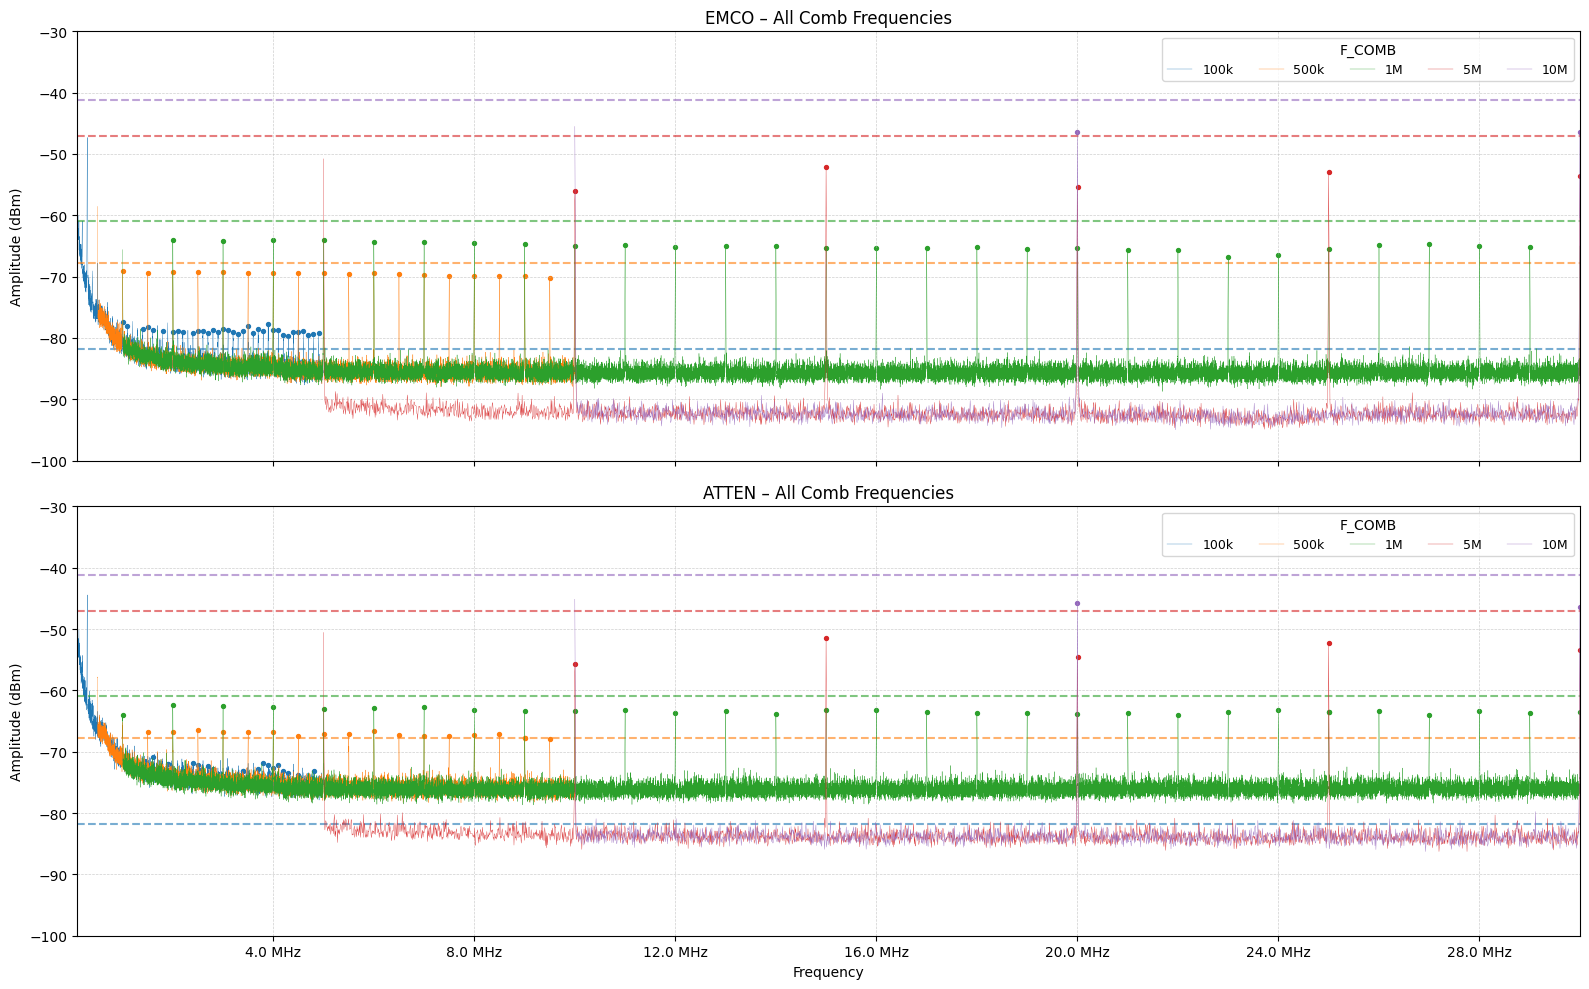

In [18]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

def freq_formatter(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f} MHz'
    elif x >= 1e3:
        return f'{x/1e3:.0f} kHz'
    else:
        return f'{x:.0f} Hz'

f_combs = ['100k', '500k', '1M', '5M', '10M']


ATTEN_PATH = r"C:\Users\enfxm\Desktop\Python\TekBox-Comb-Generator-EMI-Calibration-Analysis\EMI_CSV_FILES\ATTEN166\LINE"
EMCO_PATH  = r"C:\Users\enfxm\Desktop\Python\TekBox-Comb-Generator-EMI-Calibration-Analysis\EMI_CSV_FILES\EMCO3810\LINE"

fig, (ax_emco, ax_atten) = plt.subplots(
    2, 1, figsize=(16, 10), sharex=True
)

colors = {
    '100k': 'tab:blue',
    '500k': 'tab:orange',
    '1M':   'tab:green',
    '5M':   'tab:red',
    '10M':  'tab:purple'
}

for i, fcomb in enumerate(f_combs):

    emco_df  = pd.read_csv(f"{EMCO_PATH}\\{fcomb}-EMCO3810-LINE")
    atten_df = pd.read_csv(f"{ATTEN_PATH}\\{fcomb}-ATTEN166-LINE")

    if i == 0:
        peaks_emco,_  = find_peaks(emco_df['Amplitude (dBm)'], width=10, height=(None, -70))
        peaks_atten,_ = find_peaks(atten_df['Amplitude (dBm)'], width=8,  height=(None, -70))
        tekbox_level = -81.84
    elif i == 1:
        peaks_emco,_  = find_peaks(emco_df['Amplitude (dBm)'], width=11.2)
        peaks_atten,_ = find_peaks(atten_df['Amplitude (dBm)'], width=11.2)
        tekbox_level = -67.72
    elif i == 2:
        peaks_emco,_  = find_peaks(emco_df['Amplitude (dBm)'], height=-69)
        peaks_atten,_ = find_peaks(atten_df['Amplitude (dBm)'], height=-69)
        tekbox_level = -60.99
    elif i == 3:
        peaks_emco,_  = find_peaks(emco_df['Amplitude (dBm)'], height=-69)
        peaks_atten,_ = find_peaks(atten_df['Amplitude (dBm)'], height=-69)
        tekbox_level = -47.12
    else:
        peaks_emco,_  = find_peaks(emco_df['Amplitude (dBm)'], height=-69)
        peaks_atten,_ = find_peaks(atten_df['Amplitude (dBm)'], height=-69)
        tekbox_level = -41.19

    EMCO_PEAKS_df  = emco_df.iloc[peaks_emco]
    ATTEN_PEAKS_df = atten_df.iloc[peaks_atten]

    # ---------- EMCO subplot ----------
    ax_emco.plot(
        emco_df['Frequency (Hz)'],
        emco_df['Amplitude (dBm)'],
        linewidth=0.25,
        color=colors[fcomb],
        label=fcomb
    )

    ax_emco.scatter(
        EMCO_PEAKS_df['Frequency (Hz)'],
        EMCO_PEAKS_df['Amplitude (dBm)'],
        s=8,
        color=colors[fcomb]
    )

    ax_emco.axhline(
        tekbox_level,
        color=colors[fcomb],
        linestyle='dashed',
        alpha=0.6
    )

    # ---------- ATTEN subplot ----------
    ax_atten.plot(
        atten_df['Frequency (Hz)'],
        atten_df['Amplitude (dBm)'],
        linewidth=0.25,
        color=colors[fcomb],
        label=fcomb
    )

    ax_atten.scatter(
        ATTEN_PEAKS_df['Frequency (Hz)'],
        ATTEN_PEAKS_df['Amplitude (dBm)'],
        s=8,
        color=colors[fcomb]
    )

    ax_atten.axhline(
        tekbox_level,
        color=colors[fcomb],
        linestyle='dashed',
        alpha=0.6
    )

    delta_lisn = (
        np.average(EMCO_PEAKS_df['Amplitude (dBm)']) -
        np.average(ATTEN_PEAKS_df['Amplitude (dBm)'])
    )

    print(f"{fcomb}: ΔLISN = {delta_lisn:.2f} dBm")

# ---------- Formatting ----------
for ax in (ax_emco, ax_atten):
    ax.set_ylim(-100, -30)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
    ax.legend(title="F_COMB", ncol=5, fontsize=9)

ax_emco.set_title("EMCO – All Comb Frequencies")
ax_atten.set_title("ATTEN – All Comb Frequencies")

ax_atten.set_xlim(100e3, 30e6)
ax_atten.xaxis.set_major_formatter(ticker.FuncFormatter(freq_formatter))
ax_atten.xaxis.set_major_locator(ticker.MaxNLocator(8))
ax_atten.set_xlabel("Frequency")

ax_emco.set_ylabel("Amplitude (dBm)")
ax_atten.set_ylabel("Amplitude (dBm)")

plt.tight_layout()
plt.show()
